In [211]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

## Feature Engineering

In [3]:
df = pd.read_csv('anime.csv')

In [4]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [6]:
df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [7]:
# Step 2: Handle missing values
df['genre'] = df['genre'].fillna('Unknown')

In [8]:
df['type'] = df['type'].fillna(df['type'].mode()[0])

In [9]:
df['rating'] = df['rating'].fillna(df['rating'].median())

In [10]:
# Step 3: Clean 'episodes' column
# Convert non-numeric 'episodes' to NaN and replace with the median
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
df['episodes'] = df['episodes'].fillna(df['episodes'].median())

In [11]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [12]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


In [13]:
# Step 4: Feature Engineering

# Vectorize the 'genre' column using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
genre_vectors = tfidf.fit_transform(df['genre'])

In [14]:
# Encode the 'type' column using one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
type_encoded = encoder.fit_transform(df[['type']])

In [15]:
# Normalize 'rating' and 'members'
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df[['rating', 'members']])

In [16]:
# Combine all features into a single feature matrix (gener, type, rating, members)
feature_matrix = np.hstack((genre_vectors.toarray(), type_encoded, normalized_features))

In [17]:
feature_matrix.shape

(12294, 54)

## EDA

In [ ]:
sns.set()

In [49]:
# Step 1: Dataset Overview
anime_summary = {
    "Shape": df.shape,
    "Columns": df.columns.tolist(),
    "Missing Values": df.isnull().sum().to_dict(),
    "Data Types": df.dtypes.to_dict(),
}

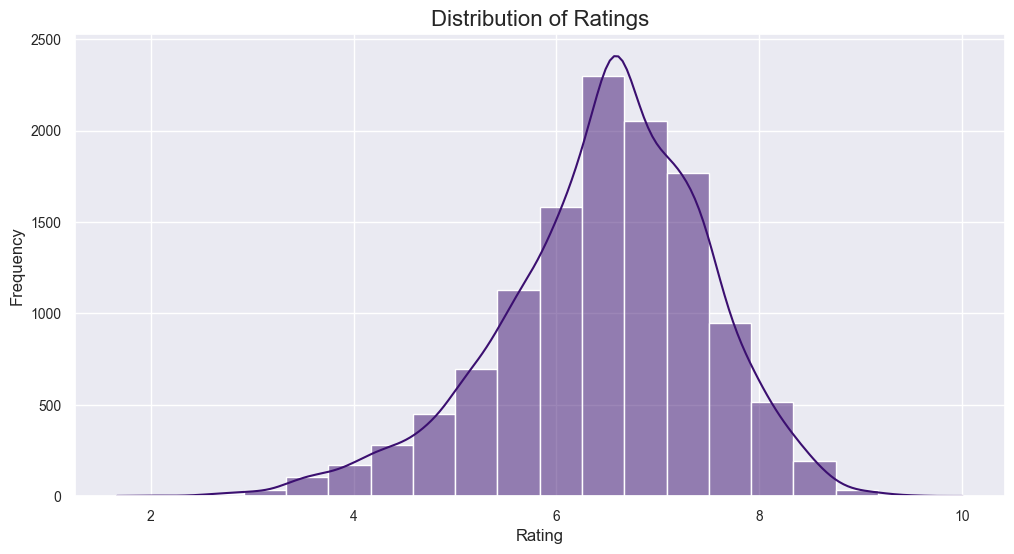

In [66]:
# Step 2: Univariate Analysis

# Plot distribution of numerical features
plt.figure(figsize=(12, 6))
sns.histplot(df['rating'], kde=True, bins=20, color=sns.color_palette("magma", as_cmap=True)(0.2))
plt.title("Distribution of Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

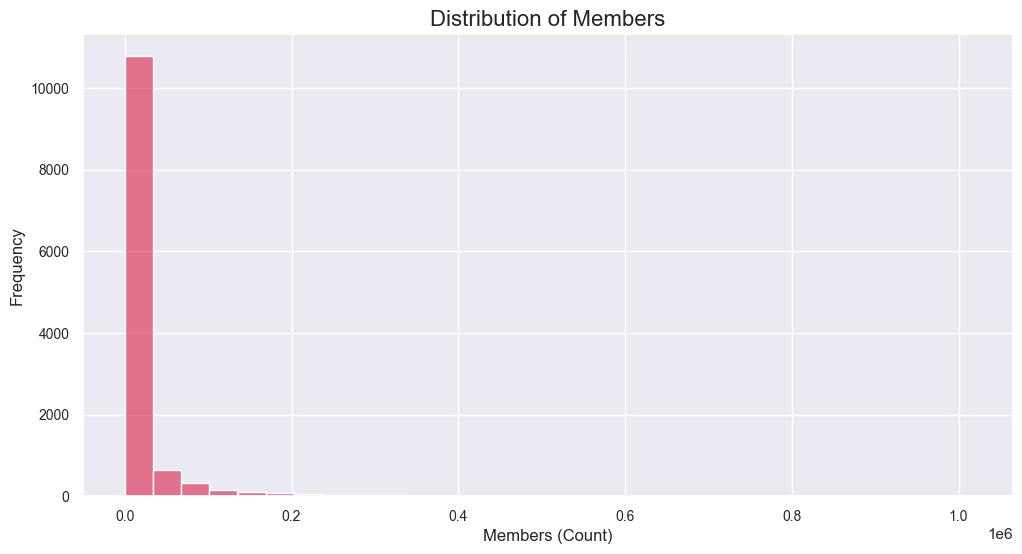

In [68]:
plt.figure(figsize=(12, 6))
sns.histplot(df['members'], kde=False, bins=30, color=sns.color_palette("magma", as_cmap=True)(0.6))
plt.title("Distribution of Members", fontsize=16)
plt.xlabel("Members (Count)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_29076\2742529347.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="type", order=df['type'].value_counts().index, palette="rocket")


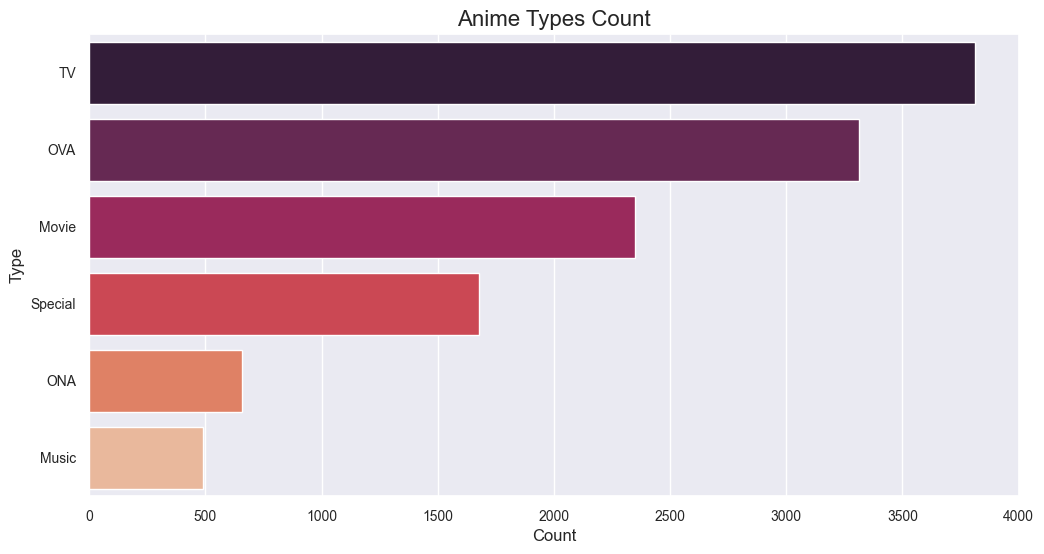

In [73]:
# Plot count of anime types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="type", order=df['type'].value_counts().index, palette="rocket")
plt.title("Anime Types Count", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Type", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

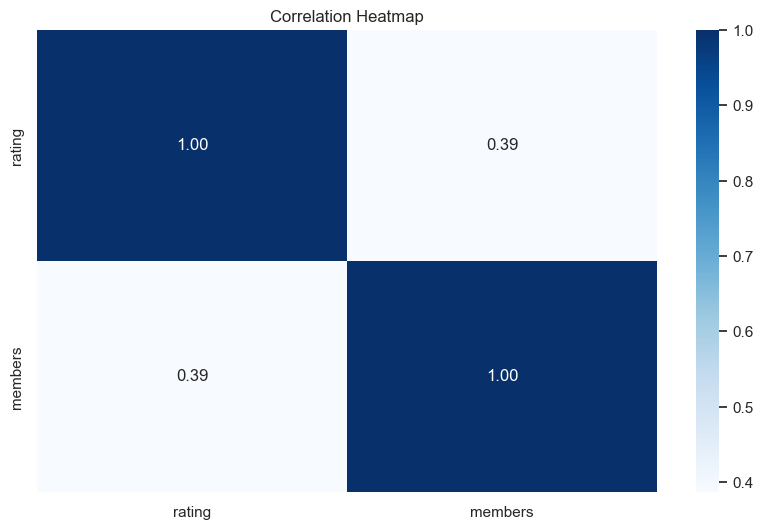

In [59]:
# Step 3: Multivariate Analysis

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df[['rating', 'members']].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [25]:
# Step 4: Feature-Specific Insights

# Most common genres
genre_list = df['genre'].dropna().str.split(', ').sum()
most_common_genres = Counter(genre_list).most_common(10)

In [26]:
genres_df = pd.DataFrame(most_common_genres, columns=["Genre", "Count"])

C:\Users\hp\AppData\Local\Temp\ipykernel_29076\205013232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genres_df, x="Count", y="Genre", palette="rocket")


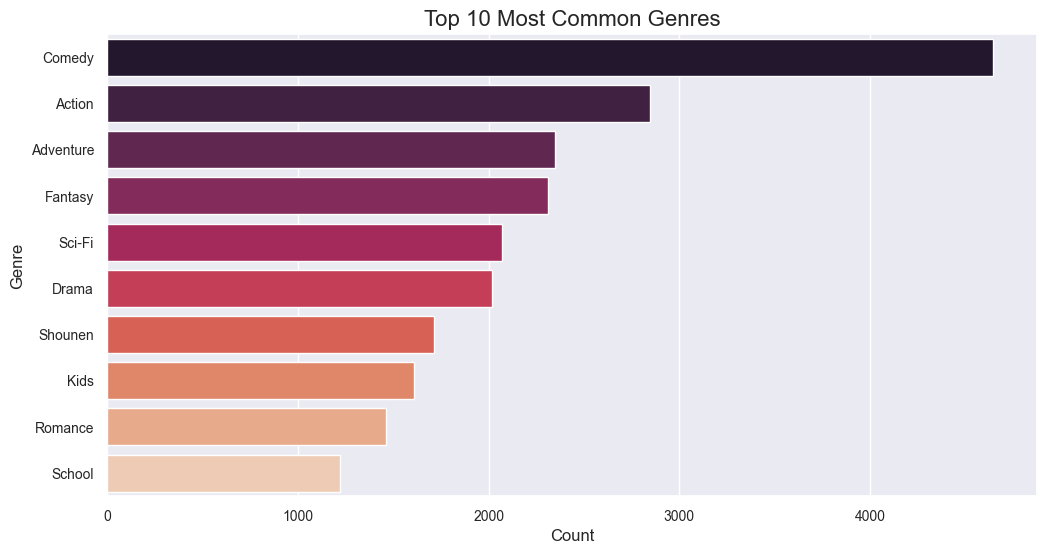

In [76]:
plt.figure(figsize=(12, 6))
sns.barplot(data=genres_df, x="Count", y="Genre", palette="rocket")
plt.title("Top 10 Most Common Genres", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [28]:
# Step 5: Top and Bottom Performers

# Top-rated anime
top_rated = df.nlargest(10, 'rating')[['name', 'rating', 'members', 'type']]
print("Top Rated Anime:")
print(top_rated)

Top Rated Anime:
                                          name  rating  members   type
10464  Taka no Tsume 8: Yoshida-kun no X-Files   10.00       13  Movie
10400              Spoon-hime no Swing Kitchen    9.60       47     TV
9595                          Mogura no Motoro    9.50       62  Movie
0                               Kimi no Na wa.    9.37   200630  Movie
9078                              Kahei no Umi    9.33       44  Movie
1             Fullmetal Alchemist: Brotherhood    9.26   793665     TV
2                                     Gintama°    9.25   114262     TV
10786          Yakusoku: Africa Mizu to Midori    9.25       53    OVA
3                                  Steins;Gate    9.17   673572     TV
4                                Gintama&#039;    9.16   151266     TV


In [29]:
# Most members
most_members = df.nlargest(10, 'members')[['name', 'members', 'rating', 'type']]
print("\nMost Popular Anime (Members):")
print(most_members)


Most Popular Anime (Members):
                                 name  members  rating type
40                         Death Note  1013917    8.71   TV
86                 Shingeki no Kyojin   896229    8.54   TV
804                  Sword Art Online   893100    7.83   TV
1    Fullmetal Alchemist: Brotherhood   793665    9.26   TV
159                      Angel Beats!   717796    8.39   TV
19    Code Geass: Hangyaku no Lelouch   715151    8.83   TV
841                            Naruto   683297    7.81   TV
3                         Steins;Gate   673572    9.17   TV
445                  Mirai Nikki (TV)   657190    8.07   TV
131                         Toradora!   633817    8.45   TV


## Modeling

In [212]:
param_grid = {
    'n_neighbors': [5, 10, 15],
    'metric': ['cosine', 'euclidean', 'manhattan']
}

In [213]:
# Initialize the parameter grid
grid = ParameterGrid(param_grid)

In [214]:
# Function to evaluate a given configuration
def evaluate_model(data, feature_matrix, params):
    nn_model = NearestNeighbors(metric=params['metric'], algorithm='brute', n_neighbors=params['n_neighbors'])
    nn_model.fit(feature_matrix)
    
    # Evaluate with a custom evaluation metric (e.g., Mean Squared Error)
    mse_list = []
    for i in range(len(feature_matrix)):
        distances, indices = nn_model.kneighbors(feature_matrix[i].reshape(1, -1))
        mse = mean_squared_error(distances.flatten(), [0]*len(distances.flatten()))
        mse_list.append(mse)
    
    return np.mean(mse_list)

# Perform hyperparameter tuning
best_params = None
best_score = float('inf')

In [215]:
for params in grid:
    score = evaluate_model(df, feature_matrix, params)
    print(f"Evaluating {params}: MSE = {score}")
    if score < best_score:
        best_score = score
        best_params = params

Evaluating {'metric': 'cosine', 'n_neighbors': 5}: MSE = 0.002549598444947858
Evaluating {'metric': 'cosine', 'n_neighbors': 10}: MSE = 0.004817345299264415
Evaluating {'metric': 'cosine', 'n_neighbors': 15}: MSE = 0.006694923204974115
Evaluating {'metric': 'euclidean', 'n_neighbors': 5}: MSE = 0.10995353441069226
Evaluating {'metric': 'euclidean', 'n_neighbors': 10}: MSE = 0.17876982061526744
Evaluating {'metric': 'euclidean', 'n_neighbors': 15}: MSE = 0.2268873185190758
Evaluating {'metric': 'manhattan', 'n_neighbors': 5}: MSE = 0.355360926696828
Evaluating {'metric': 'manhattan', 'n_neighbors': 10}: MSE = 0.5984350103769377
Evaluating {'metric': 'manhattan', 'n_neighbors': 15}: MSE = 0.775249727377776


In [216]:
print(f"Best Parameters: {best_params} with MSE: {best_score}")

Best Parameters: {'metric': 'cosine', 'n_neighbors': 5} with MSE: 0.002549598444947858


In [217]:
# Use the best parameters to initialize the model
nearest_neighbors = NearestNeighbors(
    metric=best_params['metric'],
    algorithm='brute',
    n_neighbors=best_params['n_neighbors']
)
nearest_neighbors.fit(feature_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [219]:
def content_based_recommendation_final(data, feature_matrix, nn_model, anime_type, last_anime, top_n=5):
    """
    Content-based recommendation system with filtering and exclusion of input anime.
    
    Parameters:
        data (pd.DataFrame): Anime dataset.
        feature_matrix (ndarray): Feature matrix for all anime.
        nn_model: Precomputed NearestNeighbors model.
        anime_type (str): Preferred anime type (e.g., "TV", "Movie").
        last_anime (str): Title of the last liked anime.
        top_n (int): Number of recommendations to provide.
    
    Returns:
        pd.DataFrame: Top N recommended anime based on user inputs.
    """
    try:
        # Step 1: Find the index of the last liked anime
        input_index = data[data['name'].str.contains(last_anime, case=False, na=False)].index[0]
    except IndexError:
        return f"Anime titled '{last_anime}' not found in the dataset."
    
    # Step 2: Find nearest neighbors for the last liked anime
    distances, indices = nn_model.kneighbors(feature_matrix[input_index].reshape(1, -1), n_neighbors=top_n + 10)
    recommended_indices = indices.flatten()
    
    # Step 3: Exclude the input anime itself
    recommended_indices = [i for i in recommended_indices if i != input_index]
    
    # Step 4: Retrieve recommendations and filter by type
    recommendations = data.iloc[recommended_indices][['name', 'type', 'genre', 'rating', 'members']]
    if anime_type.lower() != "all":
        recommendations = recommendations[
            recommendations['type'].str.contains(anime_type, case=False, na=False)
        ]
    
    # Step 5: Return the top N recommendations
    return recommendations.head(top_n)

In [136]:
user_type = "TV"  # User preference: "TV" or "Movie"
user_last_anime = "kimi no na wa"  # Last liked anime title

# Generate recommendations using the correct function call
recommendations_nn = content_based_recommendation_final(df, feature_matrix, nearest_neighbors, user_type, user_last_anime, top_n=5)

# Display recommendations
if isinstance(recommendations_nn, pd.DataFrame):
    print("Anime Recommendations:")
    print(recommendations_nn)
else:
    print(recommendations_nn)

Anime Recommendations:
Empty DataFrame
Columns: [name, type, genre, rating, members]
Index: []


In [220]:
cosine_sim_matrix = pd.DataFrame(
    cosine_similarity(feature_matrix),
    index=df['name'],
    columns=df['name']
)

In [221]:
print("Cosine similarity matrix computed.")
cosine_sim_matrix

Cosine similarity matrix computed.


name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Super Erotic Anime,Taimanin Asagi 3,Teleclub no Himitsu,Tenshi no Habataki Jun,The Satisfaction,Toushindai My Lover: Minami tai Mecha-Minami,Under World,Violence Gekiga David no Hoshi,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Yasuji no Pornorama: Yacchimae!!
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,1.000000,0.448426,0.372282,0.388356,0.371744,0.551500,0.383573,0.433049,0.454167,0.365154,...,0.154294,0.390497,0.165788,0.147972,0.150083,0.138401,0.145321,0.176622,0.181722,0.278206
Fullmetal Alchemist: Brotherhood,0.448426,1.000000,0.670201,0.699438,0.677380,0.698384,0.776113,0.413073,0.420635,0.661395,...,0.112817,0.188719,0.121226,0.108213,0.109749,0.101219,0.106271,0.129160,0.132879,0.203414
Gintama°,0.372282,0.670201,1.000000,0.695894,0.999746,0.711007,0.707497,0.361768,0.804573,0.999782,...,0.124006,0.207366,0.133244,0.118923,0.120621,0.111230,0.116792,0.141949,0.146049,0.223596
Steins;Gate,0.388356,0.699438,0.695894,1.000000,0.701906,0.617962,0.670055,0.374874,0.442811,0.688217,...,0.114701,0.191860,0.123249,0.110017,0.111580,0.102905,0.108043,0.131314,0.135097,0.206812
Gintama&#039;,0.371744,0.677380,0.999746,0.701906,1.000000,0.710014,0.710691,0.360011,0.802880,0.999155,...,0.122752,0.205272,0.131896,0.117721,0.119401,0.110106,0.115612,0.140514,0.144572,0.221333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0.138401,0.101219,0.111230,0.102905,0.110106,0.110265,0.106934,0.523098,0.136937,0.109883,...,0.999706,0.756189,0.999124,0.999894,0.999841,1.000000,0.999944,0.998287,0.997795,0.715128
Under World,0.145321,0.106271,0.116792,0.108043,0.115612,0.115780,0.112277,0.527654,0.143786,0.115379,...,0.999906,0.758606,0.999509,0.999992,0.999974,0.999944,1.000000,0.998848,0.998439,0.717963
Violence Gekiga David no Hoshi,0.176622,0.129160,0.141949,0.131314,0.140514,0.140718,0.136460,0.547649,0.174757,0.140231,...,0.999412,0.768541,0.999861,0.999034,0.999171,0.998287,0.998848,1.000000,0.999969,0.729855


In [ ]:
cosine_sim_matrix = cosine_similarity(feature_matrix)
cosine_sim_df = pd.DataFrame(
    cosine_sim_matrix,
    columns=df['name'],
    index=df['name']
)

In [223]:
print("Top 5 Cosine Similarities:")
cosine_sim_df.iloc[:5, :5]

Top 5 Cosine Similarities:


name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;
name,,,,,
Kimi no Na wa.,1.000000,0.448426,0.372282,0.388356,0.371744
Fullmetal Alchemist: Brotherhood,0.448426,1.000000,0.670201,0.699438,0.677380
Gintama°,0.372282,0.670201,1.000000,0.695894,0.999746
Steins;Gate,0.388356,0.699438,0.695894,1.000000,0.701906
Gintama&#039;,0.371744,0.677380,0.999746,0.701906,1.000000


## Other Experiment

In [ ]:
# Collect user input
user_type = input("Do you prefer TV or Movie anime? (Enter 'TV' or 'Movie'): ").strip()
user_last_anime = input("What is the last anime you liked? (Enter the title): ").strip()

# Generate recommendations based on user inputs
final_recommendations = content_based_recommendation_final(df, feature_matrix, nearest_neighbors, user_type, user_last_anime, top_n=5)

# Display recommendations directly
if isinstance(final_recommendations, pd.DataFrame):
    print("\nRecommended Anime:")
    print(final_recommendations)
else:
    print(final_recommendations)

## GUI

In [137]:
import tkinter as tk
from tkinter import ttk
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from tkinter import PhotoImage
from tkinter.scrolledtext import ScrolledText

In [ ]:
def generate_recommendations():
    """Generate recommendations based on user input."""
    anime_type = type_var.get().strip()
    last_anime = last_anime_var.get().strip()  
    
    # Clear the previous results in the ScrolledText widget
    result_label.delete('1.0', tk.END)
    
    if not last_anime:
        result_label.insert(tk.END, "Error: Please enter a valid anime title.")
        return
    
    try:
        # Get recommendations
        recommendations = content_based_recommendation_final(
            df, feature_matrix, nearest_neighbors, anime_type, last_anime, top_n=5
        )
        
        if isinstance(recommendations, pd.DataFrame) and not recommendations.empty:
            # If the recommendations include entries for the preferred type
            result_text = "\n".join([
                f"{i+1}. {row['name']}\n   Genre: {row['genre']}\n   Rating: {row['rating']}\n   Type: {row['type']}\n"
                for i, row in recommendations.iterrows()
            ])
            result_label.insert(tk.END, result_text)
        elif isinstance(recommendations, pd.DataFrame) and recommendations.empty:
            # Add a note if no recommendations match the user's preferred type
            result_label.insert(tk.END, 
                                f"Note: No recommendations found matching your preference according to type ({type_var.get()}).\n"
                                "However, we have recommended some anime that you may still find interesting:\n\n")
            
            # General recommendations (ignoring type filter)
            general_recommendations = content_based_recommendation_final(
                df, feature_matrix, nearest_neighbors, "all", last_anime, top_n=5
            )
            general_text = "\n".join([
                f"{i+1}. {row['name']}\n   Genre: {row['genre']}\n   Rating: {row['rating']}\n   Type: {row['type']}\n"
                for i, row in general_recommendations.iterrows()
            ])
            result_label.insert(tk.END, general_text)
        elif isinstance(recommendations, str):
            # Handle case when a failure message is returned
            result_label.insert(tk.END, recommendations)
        else:
            # Handle empty or unexpected recommendation output
            result_label.insert(tk.END, "No recommendations found. Try a different anime or type.")
    
    except Exception as e:
        # Handle unexpected errors
        result_label.insert(tk.END, f"An error occurred: {str(e)}")
        print(f"Error: {e}")  # Debugging output


In [ ]:
# GUI Setup
root = tk.Tk()
root.title("Anime Recommender System")
root.geometry("800x500")  # Set fixed window size

# Set up background image
bg_image = PhotoImage(file=r"C:\Users\hp\Downloads\background-1.png") 
bg_label = tk.Label(root, image=bg_image)
bg_label.place(relwidth=1, relheight=1) 

# Frame for input fields and buttons
frame = tk.Frame(root, bg="white", padx=10, pady=10)
frame.place(relx=0.5, rely=0.1, anchor="n") 

# Anime Type Input
type_label = tk.Label(frame, text="Preferred Anime Type (TV or Movie):", bg="white")
type_label.grid(row=0, column=0, sticky="w", pady=5)

type_var = tk.StringVar(value="TV")
type_entry = ttk.Combobox(frame, textvariable=type_var, values=["TV", "Movie"])
type_entry.grid(row=0, column=1, pady=5)

# Last Anime Input
last_anime_label = tk.Label(frame, text="Last Anime You Liked:", bg="white")
last_anime_label.grid(row=1, column=0, sticky="w", pady=5)

last_anime_var = tk.StringVar()
last_anime_entry = tk.Entry(frame, textvariable=last_anime_var, width=40)
last_anime_entry.grid(row=1, column=1, pady=5)

# Generate Button
generate_button = tk.Button(frame, text="Get Recommendations", command=generate_recommendations)
generate_button.grid(row=2, column=0, columnspan=2, pady=10)

# Result Display (ScrolledText for better UX)
result_label = ScrolledText(root, wrap=tk.WORD, height=10, width=50, bg="white", padx=10, pady=10)
result_label.place(relx=0.5, rely=0.4, anchor="n")  

# Run GUI Loop
root.mainloop()

## Challenges:
1. Cold Start Problem: New users or items with no data are difficult to handle in content-based filtering.
   Proposed Solution: Integrate collaborative filtering or hybrid models.

2. Sparsity: High sparsity in feature matrix leads to reduced accuracy.
   Proposed Solution: Dimensionality reduction using techniques like PCA.

3. Scalability: High computational cost for large datasets.
   Proposed Solution: Pre-compute similarity matrices and use efficient algorithms for real-time recommendations.